## Problem Statement

> ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
>
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.
>
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets



In [1]:
 medical_data_link = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

 from urllib.request import urlretrieve

 urlretrieve(medical_data_link, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f4f17ea9840>)

In [2]:
import pandas as pd

In [3]:
medical = pd.read_csv('medical.csv')
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


CHARGES is the column with the target values.

In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
!pip install plotly matplotlib seaborn --quiet

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
medical.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [9]:
fig = px.histogram(medical, x = 'age',
                   marginal='box', nbins=47,
                   title='Age distribution')
fig.update_layout(bargap=0.1)
fig.show()

The age 18 and 19 counts for about double the number of customers probably because those are the age for young people to be insured for the first time.

In [10]:
fig = px.histogram(medical,
                   x='bmi', marginal="box",
                   color='sex',
                   color_discrete_sequence=['red', 'grey'],
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

bmi

under 18.5 is underweight,

18.5-24.9 is normal weight,

25-29.9 is overweight,

30-39.9 is obesity,

over 40 is morbid obesity

In [11]:
fig = px.histogram(medical,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

It seems smokers have a lot higher amount of medical charges per year compared to non smokers.

In [12]:
fig = px.histogram(medical,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['blue', 'green'],
                   title='Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

A lot of outliers can be seen in the data especially for female population. Although the two gender's median are close, charges are on average higher for men due to extreme outliers lying upwards of 40k dollars.

In [13]:
fig = px.histogram(medical,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['blue', 'pink', 'green', 'orange'],
                   title='Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()


medical.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


The southeast region has the lowest mean charges while containing the most population among the four regions.

In [14]:
px.histogram(medical, x='smoker', color='sex', title='Smoker vs Sex')

In [15]:
fig = px.scatter(medical, x='age', y='charges', color='smoker', opacity=0.8,
                 hover_data=['sex'], title='Age vs Charges')
fig.update_traces(marker_size = 6)
fig.show()

3 clusters appear. The bottom one consists of nonsmokers whose medical charges increase with age as expected. the middle cluster higher than that one seem to be an overlap of the smokers and nonsmokers ('nonsmokers with medical issues' and 'smokers without major medical issues')
the top cluster consists of smokers with major issues that may or may not have been worsened by smoking habit

In [16]:
fig = px.scatter(medical, x='bmi', y='charges', color ='smoker', opacity=0.8, hover_data=['sex'],
                 title='BMI vs Charges')
fig.update_traces(marker_size=6)
fig.show()

In [17]:
px.violin(medical, x='children', y='charges')

In [18]:
#CORRELATION

medical.charges.corr(medical.age)

0.2990081933306476

In [19]:
medical.charges.corr(medical.bmi)

0.19834096883362895

In [20]:
medical.charges.corr(medical.children)

0.06799822684790478

In [21]:
medical.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


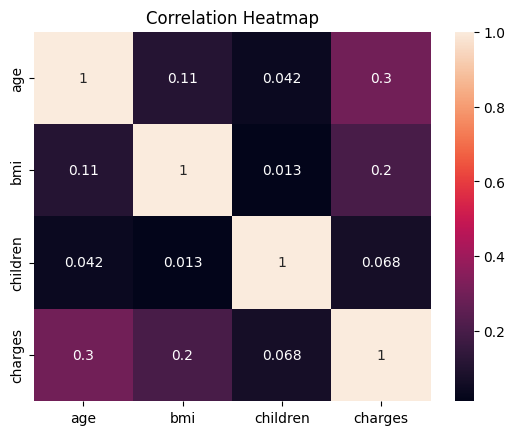

In [22]:
sns.heatmap(medical.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap');

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

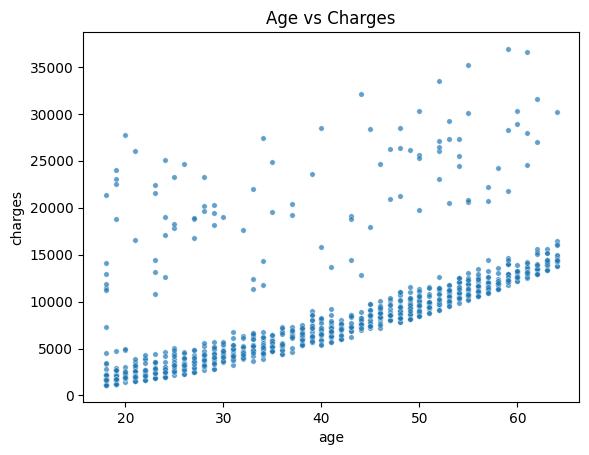

In [23]:
smoker_values = {'yes': 1, 'no': 0}
medical.smoker = medical.smoker.map(smoker_values)
non_smoker = medical[medical.smoker == 0]
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker, x='age', y='charges', alpha=0.7, s=15)

In [24]:
def estimate_charges(age, w, b):
  return w * age + b

w=50
b=100
ages = non_smoker.age
estimated_charges = estimate_charges(ages, w, b)

Text(0, 0.5, 'Estimated Charges')

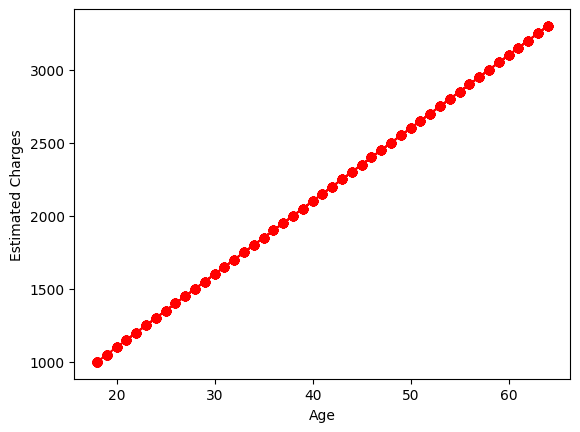

In [25]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

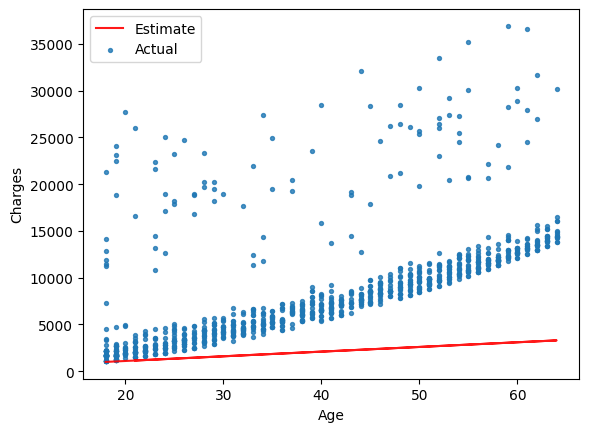

In [26]:
target = non_smoker.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [27]:
def try_parameters(w, b):
  ages = non_smoker.age
  target = non_smoker.charges

  estimated_charges = estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.9)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

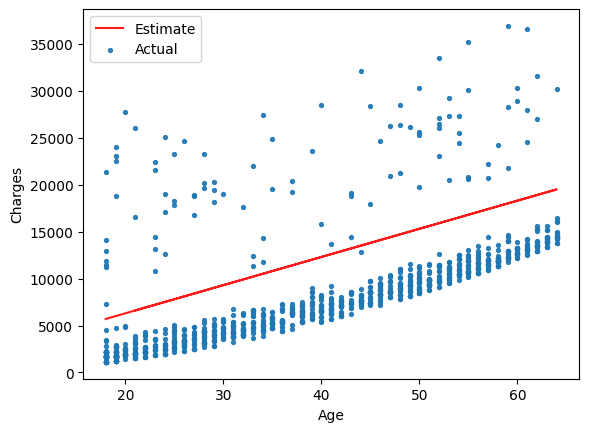

In [28]:
try_parameters(300, 300)

In [29]:
#LOSS FUNCTION

import numpy as np

In [68]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [31]:
w = 100
b = 300

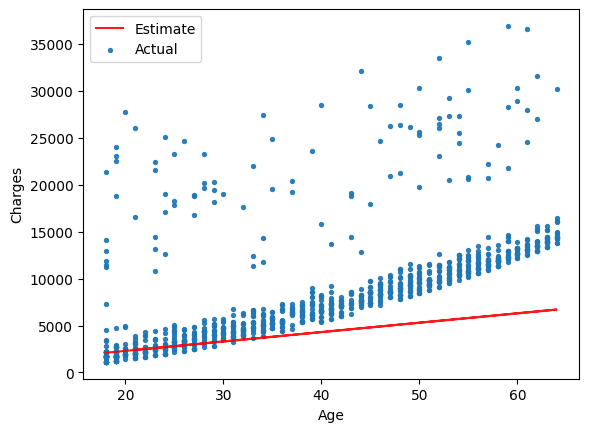

In [32]:
try_parameters(w, b)

In [33]:
targets = non_smoker['charges']
predicted = estimate_charges(non_smoker.age, w, b)

In [34]:
rmse(targets, predicted)

6699.702042725354

AS WE CALCULATE THE LOSS FUNCTION WITH ROOT MEAN SQUARE ERROR, IT IS FOUND THAT WITH PARAMETER VALUES OF W = 100 AND B = 300 THE AVERAGE ERROR  OR RESIDUAL OF PREDICTED VALUES IS $6699.7

In [69]:
def try_parameters(w, b):
  ages = non_smoker.age
  target = non_smoker.charges

  estimated_charges = estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.9)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

  loss = rmse(target, estimated_charges)
  plt.title(f"RMSE loss: {loss}")

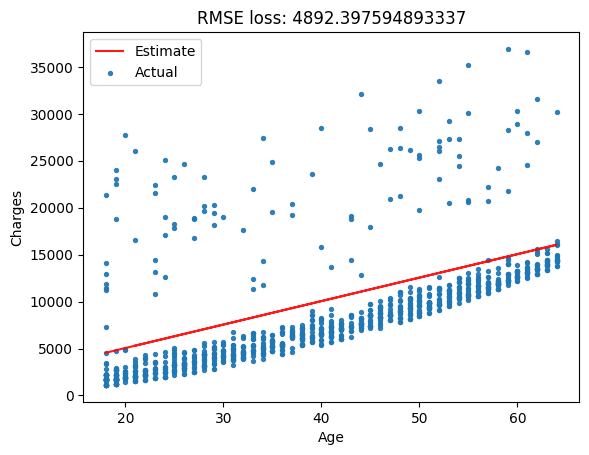

In [36]:
try_parameters(250, 50)

In [37]:
#LINEAR REGRESSION

!pip install scikit-learn --quiet

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [39]:
model = LinearRegression()
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [75]:
inputs = non_smoker[['age']]
targets = non_smoker.charges

print('inputs.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [76]:
model.fit(inputs, targets)

LinearRegression()

In [77]:
model.predict(np.array([[23],
 [37]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([4055.30443855, 7796.78921819])

In [78]:
predictions = model.predict(inputs)

In [79]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [80]:
rmse(targets, predictions)

4662.505766636395

Prediction is in accurate by $4662.5

In [81]:
model.coef_

array([267.24891283])

In [82]:
model.intercept_

-2091.4205565650864

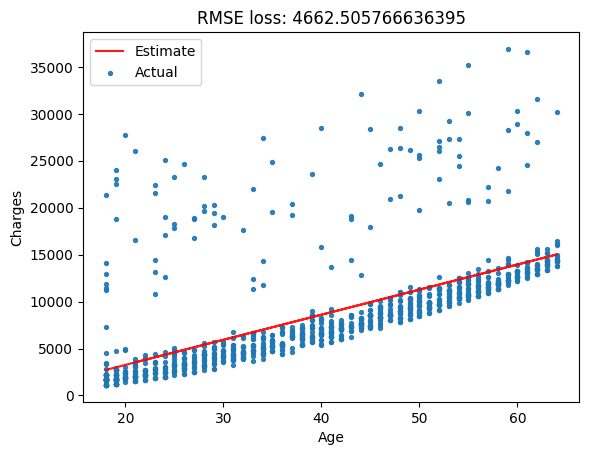

In [83]:
try_parameters(model.coef_, model.intercept_)

In [84]:
param_grid = {
    'fit_intercept': [True, False],
    # 'normalize': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}
model = LinearRegression()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(inputs, targets)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (Negative Mean Squared Error):", grid_search.best_score_)

best_model = grid_search.best_estimator_

predictions = best_model.predict(inputs)

from sklearn.metrics import mean_squared_error
import numpy as np

def rmse_func(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))
rmse = np.sqrt(mean_squared_error(targets, predictions))
print("RMSE:", rmse)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score (Negative Mean Squared Error): -21877878.269941434
RMSE: 4662.505766636395


In [85]:
inputs, targets = non_smoker[['age', 'bmi', 'children']], non_smoker['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse_func(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [86]:
fig = px.scatter_3d(non_smoker, x='age', y='bmi', z='charges', color='children')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [52]:
from sklearn.linear_model import SGDRegressor

In [89]:
from sklearn.preprocessing import StandardScaler
inputs, targets = non_smoker[['age', 'bmi', 'children']], non_smoker['charges']
scaler = StandardScaler()
scaler.fit(inputs)
inputs = scaler.transform(inputs)

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression().fit(inputs, targets)
linear_predictions = linear_model.predict(inputs)
linear_rmse = np.sqrt(mean_squared_error(targets, linear_predictions))
linear_r2 = r2_score(targets, linear_predictions)

# SGDRegressor
sgd_model = SGDRegressor(max_iter=1000, eta0=0.01).fit(inputs, targets)
sgd_predictions = sgd_model.predict(inputs)
sgd_rmse = np.sqrt(mean_squared_error(targets, sgd_predictions))
sgd_r2 = r2_score(targets, sgd_predictions)


print("Linear Regression:")
print(f"  RMSE: {linear_rmse}")
print(f"  R-squared: {linear_r2}")

print("\nSGDRegressor:")
print(f"  RMSE: {sgd_rmse}")
print(f"  R-squared: {sgd_r2}")

results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'SGDRegressor'],
    'RMSE': [linear_rmse, sgd_rmse],
    'R-squared': [linear_r2, sgd_r2]
})

print("\nPerformance Comparison:")
results_df

Linear Regression:
  RMSE: 4608.470405038247
  R-squared: 0.408274740172451

SGDRegressor:
  RMSE: 4608.613649587061
  R-squared: 0.4082379545461017

Performance Comparison:


,Model,RMSE,R-squared
0,Linear Regression,4608.470405,0.408275
1,SGDRegressor,4608.613650,0.408238


Adding extra feature (number of children) to train the models improved their performance by about $54.

## Predict medical charges on new client data

In [56]:
new_data = pd.DataFrame({
    'age': [25, 45, 60],
    'bmi': [22.0, 30.5, 28.0],
    'children': [0, 2, 1]
})

predictions_lr = model.predict(new_data)
print('Linear Regression Predictions:', predictions_lr)

new_data_scaled = scaler.transform(new_data)

predictions_sgd = sgd_model.predict(new_data_scaled)
print('SGD Regressor Predictions:', predictions_sgd)

Linear Regression Predictions: [ 4533.94284998  9931.61596489 13917.07594574]
SGD Regressor Predictions: [ 4531.86342146  9914.136949   13912.47297335]


Both models Linear regression and SGD Regressor were trained and evaluated on the dataset. The Linear Regression model had an RMSE of approximately 4608.57, while the SGD Regressor had an RMSE of approximately 4608.61. Both models performed similarly, probably because we worked with very little features.

This project demonstrates the process of building and evaluating regression models to predict medical charges, providing valuable insights for determining insurance premiums.